## **KNN_Classification of Breast_cancer**

### *Import Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,classification_report,RocCurveDisplay
import joblib

### *Load The Dataset*

In [2]:
#Load the csv file
df=pd.read_csv("D:\\breast_cancer.csv")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


### *Data Cleaning*

In [3]:
#Remove UNwanted columns
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)

### *Exploratery Data Analysis(EDA):*

In [4]:
#see Basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   diagnosis                569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [5]:
#check null values
df.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [6]:
#check duplicate values
df.duplicated().sum()

np.int64(0)

C:\Users\Admin\AppData\Local\Temp\ipykernel_15568\2600004577.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x='diagnosis',palette='rainbow')


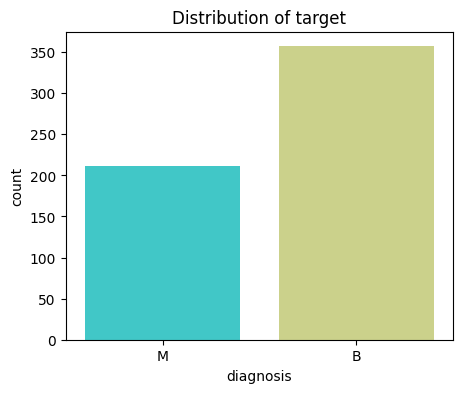

In [7]:
#Target distribution 
plt.figure(figsize=(5,4))
sns.countplot(data=df,x='diagnosis',palette='rainbow')
plt.title("Distribution of target")
plt.show()

### *Train test split*

In [8]:
x=df.drop('diagnosis',axis=1)
y=df.diagnosis

In [9]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=40)

In [10]:
# size of x_train and x_test data
print(f'size of sample in model train:{x_train.shape[0]}')
print(f'size of sample in model test:{x_test.shape[0]}' )

size of sample in model train:455
size of sample in model test:114


### *Feature engineering*

In [11]:
# Label encoding in target for Benign=0, Malignant=1
le=LabelEncoder() 
y_train=le.fit_transform(y_train)
y_test=le.transform(y_test)

In [12]:
#Feature scaling
sc=StandardScaler()
x_train_scaled=sc.fit_transform(x_train)
x_test_scaled=sc.transform(x_test)

### *Model Building and Hyperparameter Tuning*

In [13]:
#Initialize model
model=KNeighborsClassifier()

In [14]:
#Setup Gridsearchcv
params={'n_neighbors':[9,11,13],'metric':['euclidean','manhattan']}
grid_cv=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',n_jobs=-1)
grid_cv.fit(x_train_scaled,y_train)

GridSearchCV(estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': [9, 11, 13]},
             scoring='accuracy')

In [15]:
#see the best parameter
print(f'Best parameter :{grid_cv.best_params_}')

Best parameter :{'metric': 'euclidean', 'n_neighbors': 9}


In [16]:
#use the best model
best_model=grid_cv.best_estimator_

### *Model Evaluation*

In [17]:
#find accuracy score
y_pred=best_model.predict(x_test_scaled)
accuracy=accuracy_score(y_test,y_pred)
precision=precision_score(y_test,y_pred)
recall=recall_score(y_test,y_pred)
print(f'Accuracy score :{accuracy*100:.2f}%')
print(f'Precision score:{precision*100:.2f}%')
print(f'Recall score:{recall*100:.2f}%')

Accuracy score :98.25%
Precision score:100.00%
Recall score:94.87%


<Figure size 600x500 with 0 Axes>

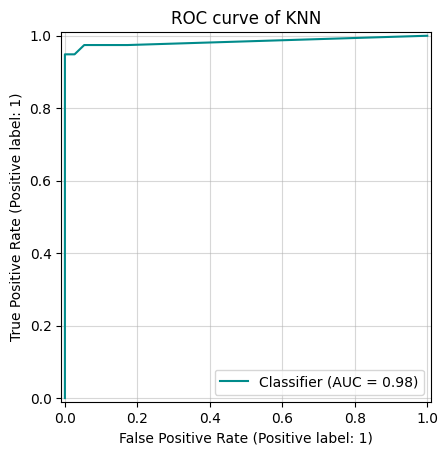

In [18]:
#plot roc-auc curve
probs_score=best_model.predict_proba(x_test_scaled)[:,1]
plt.figure(figsize=(6,5))
RocCurveDisplay.from_predictions(y_test,probs_score,color='darkcyan')
plt.title("ROC curve of KNN" )
plt.grid(alpha=0.5)
plt.show()

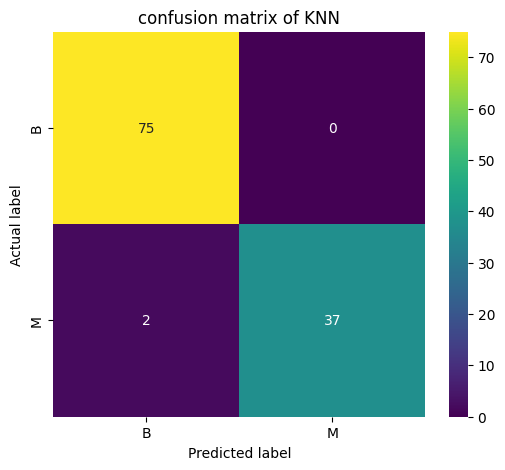

In [19]:
#plot Confusion matrix
conf=confusion_matrix(y_test,y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(conf,annot=True,cmap='viridis',xticklabels=['B','M'],yticklabels=['B','M'])
plt.xlabel('Predicted label')
plt.ylabel('Actual label')
plt.title("confusion matrix of KNN")
plt.show()

In [20]:
#see classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.99        75
           1       1.00      0.95      0.97        39

    accuracy                           0.98       114
   macro avg       0.99      0.97      0.98       114
weighted avg       0.98      0.98      0.98       114



### *Saved the Model*

In [21]:
#saved the model in joblib file
joblib.dump(best_model,'knn_breast_cancer_model.joblib')

['knn_breast_cancer_model.joblib']